# Topic Modeling using LDA

### References

* Data: ABC News Headlines (https://www.kaggle.com/therohk/million-headlines/version/6)
* Preprocess: https://towardsdatascience.com/topic-modeling-and-latent-dirichlet-allocation-in-python-9bf156893c24
* LDA: https://ratsgo.github.io/from%20frequency%20to%20semantics/2017/07/09/lda/

### Load Raw Data

In [3]:
import pandas as pd

pd.set_option('display.max_colwidth', 999)
news_data = pd.read_csv('./mallet_top_sen.tsv', sep='\t')

In [4]:
news_data.head()

,Unnamed: 0,id,Topic_Num,Topic_Perc_Contribu,Topic_Keywords,Origin_Text,Text
0,0,44029,0.0,0.2935,"analysi, multivari, regress, variabl, model, predictor, cardiac, time, univari, heart",Hazard Ratio (and 95% Confidence Intervals) in Univariate and Multivariate Analysis of Predictors of Major Cardiac Events (Cardiac Death or Worsening of Heart Failure Leading to Heart Transplantation),"['hazard', 'ratio', 'confid', 'interv', 'univari', 'multivari', 'analysi', 'predictor', 'major', 'cardiac', 'event', 'cardiac', 'death', 'worsen', 'heart', 'failur', 'lead', 'heart', 'transplant']"
1,1,23344,0.0,0.2836,"analysi, multivari, regress, variabl, model, predictor, cardiac, time, univari, heart","Left Ventricular and Right Ventricular Ejection Fractions, Left Ventricular and Right Ventricular Mean Phases, Left-to-Right Mean Phase Difference (L-RMP) and Phase Standard Deviations for Both Ventricles in 30 Cases of Left Sided WPW legend","['leav', 'ventricular', 'right', 'ventricular', 'eject', 'fraction', 'leav', 'ventricular', 'right', 'ventricular', 'mean', 'phase', 'leav', 'right', 'mean', 'phase', 'differ', 'rmp', 'phase', 'standard', 'deviat', 'ventricl', 'case', 'leav', 'side', 'wpw']"
2,2,41163,0.0,0.2817,"analysi, multivari, regress, variabl, model, predictor, cardiac, time, univari, heart","Partial Regression Coefficients (All Subjects, n = 262) for Forward Stepwise Linear Regression for Dependent Variables Augmentation Pressure and Augmentation Index legend","['partial', 'regress', 'coeffici', 'subject', 'forward', 'stepwis', 'linear', 'regress', 'depend', 'variabl', 'augment', 'pressur', 'augment', 'index']"
3,3,23343,0.0,0.2797,"analysi, multivari, regress, variabl, model, predictor, cardiac, time, univari, heart","Left Ventricular (LVEF) and Right Ventricular (RVEF) Ejection Fractions, Left Ventricular (LVMP) and Right Ventricular (RVMP) Mean Phases, Left-to-Right Mean Phase Difference (L-RMP) and Phase Standard Deviations (LVPSD and RVPSD) for Both Ventricles in 14 Cases of Right Sided WPW legend","['leav', 'ventricular', 'lvef', 'right', 'ventricular', 'rvef', 'eject', 'fraction', 'leav', 'ventricular', 'lvmp', 'right', 'ventricular', 'rvmp', 'mean', 'phase', 'leav', 'right', 'mean', 'phase', 'differ', 'rmp', 'phase', 'standard', 'deviat', 'lvpsd', 'rvpsd', 'ventricl', 'case', 'right', 'side', 'wpw']"
4,4,24968,0.0,0.2782,"analysi, multivari, regress, variabl, model, predictor, cardiac, time, univari, heart",Predictors of Mortality by Multivariable Analysis: Variables Are Shown in the Order They Entered a Stepwise Cox Regression Model,"['predictor', 'mortal', 'multivari', 'analysi', 'variabl', 'show', 'order', 'enter', 'stepwis', 'cox', 'regress', 'model']"


#### Extract target data

In [5]:
data_text = news_data[['Origin_Text']]
data_text['index'] = news_data[['Unnamed: 0']]
documents = data_text
documents.head()

/Users/gracelee/.pyenv/versions/for_jupyter/lib/python3.5/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Origin_Text,index
0,Hazard Ratio (and 95% Confidence Intervals) in Univariate and Multivariate Analysis of Predictors of Major Cardiac Events (Cardiac Death or Worsening of Heart Failure Leading to Heart Transplantation),0
1,"Left Ventricular and Right Ventricular Ejection Fractions, Left Ventricular and Right Ventricular Mean Phases, Left-to-Right Mean Phase Difference (L-RMP) and Phase Standard Deviations for Both Ventricles in 30 Cases of Left Sided WPW legend",1
2,"Partial Regression Coefficients (All Subjects, n = 262) for Forward Stepwise Linear Regression for Dependent Variables Augmentation Pressure and Augmentation Index legend",2
3,"Left Ventricular (LVEF) and Right Ventricular (RVEF) Ejection Fractions, Left Ventricular (LVMP) and Right Ventricular (RVMP) Mean Phases, Left-to-Right Mean Phase Difference (L-RMP) and Phase Standard Deviations (LVPSD and RVPSD) for Both Ventricles in 14 Cases of Right Sided WPW legend",3
4,Predictors of Mortality by Multivariable Analysis: Variables Are Shown in the Order They Entered a Stepwise Cox Regression Model,4


### Preprocessing

* Import Libraries

In [ ]:
!pip install --trusted-host pypi.org --trusted-host files.pythonhosted.org gensim

In [ ]:
!pip install --trusted-host pypi.org --trusted-host files.pythonhosted.org nltk

In [6]:
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *

import numpy as np
np.random.seed(2018)

import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/gracelee/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

* Preprocess
 1. simple_preprocess: Split Text by whitespace
 2. STOPWORDS: Remove stopwords
 3. lemmatize_stemming
 
* lemmatize_stemming
 - Lemmatizing & Stemming Replace word with original form
 - Lemmatizing consider whether the word exist in the real world
 - pos means a position of the word
 - https://m.blog.naver.com/PostView.nhn?blogId=vangarang&logNo=220963244354&proxyReferer=https%3A%2F%2Fwww.google.com%2F

In [7]:
def lemmatize_stemming(text):
    stemmer = SnowballStemmer('english')
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))

def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemmatize_stemming(token))
    return result

* Test

In [8]:
doc_sample = documents[documents['index'] == 100].values[0][0]
print('original document: ')

words = []
for word in doc_sample.split(' '):
    words.append(word)
print(words)

print('\n\n tokenized and lemmatized document: ')
print(preprocess(doc_sample))

original document: 
['Treatment', 'efficacy', 'at', 'week', '36', 'for', 'the', 'modified', 'intention-to-treat', 'population', 'in', 'the', 'open-label', 'period', 'and', 'at', 'week', '88', 'for', 'the', 'modified', 'intention-to-treat', 'subpopulations', 'in', 'the', 'double-blind', 'period']


 tokenized and lemmatized document: 
['treatment', 'efficaci', 'week', 'modifi', 'intent', 'treat', 'popul', 'open', 'label', 'period', 'week', 'modifi', 'intent', 'treat', 'subpopul', 'doubl', 'blind', 'period']


* Run

In [9]:
%time processed_docs = documents['Origin_Text'].map(preprocess)
processed_docs[:10]

CPU times: user 613 ms, sys: 3.28 ms, total: 616 ms
Wall time: 617 ms


0                                                                                        [hazard, ratio, confid, interv, univari, multivari, analysi, predictor, major, cardiac, event, cardiac, death, worsen, heart, failur, lead, heart, transplant]
1                                           [leav, ventricular, right, ventricular, eject, fraction, leav, ventricular, right, ventricular, mean, phase, leav, right, mean, phase, differ, phase, standard, deviat, ventricl, case, leav, side, legend]
2                                                                                                                   [partial, regress, coeffici, subject, forward, stepwis, linear, regress, depend, variabl, augment, pressur, augment, index, legend]
3    [leav, ventricular, lvef, right, ventricular, rvef, eject, fraction, leav, ventricular, lvmp, right, ventricular, rvmp, mean, phase, leav, right, mean, phase, differ, phase, standard, deviat, lvpsd, rvpsd, ventricl, case, right, side, legend]
4       

----

### T-SNE

* https://datascienceschool.net/view-notebook/3e7aadbf88ed4f0d87a76f9ddc925d69/
* https://lumiamitie.github.io/r/python/tsne-for-r-py/

In [10]:
### TSNE모델에는 transform 메소드가 없고 fit_transform만 있음
# library import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

np.random.seed(2018)

In [11]:
type(documents['Origin_Text'].values.tolist())

list

In [12]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()
%time vect.fit(documents['Origin_Text'].values.tolist())

CPU times: user 37.5 ms, sys: 2.7 ms, total: 40.2 ms
Wall time: 39.3 ms


CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [13]:
%time tsne_data = vect.transform(documents['Origin_Text'].values.tolist()).toarray()

CPU times: user 29.9 ms, sys: 6.2 ms, total: 36.1 ms
Wall time: 36.7 ms


In [14]:
tsne_data[:10]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [15]:
%time tsne_result = TSNE(learning_rate=300, init='pca').fit_transform(np.array(tsne_data))

CPU times: user 16.4 s, sys: 950 ms, total: 17.4 s
Wall time: 17.3 s


In [16]:
tsne_result[:10]

array([[ -5.5887737,  15.092761 ],
       [-26.751963 ,  -1.2962534],
       [ -7.7378716,   5.3128357],
       [-26.751284 ,  -1.296099 ],
       [ -5.5161123,   9.251663 ],
       [ -0.8104641,  16.026785 ],
       [ -4.9360843,  10.798    ],
       [ -7.008701 ,  11.168139 ],
       [-10.108216 ,   8.083006 ],
       [ -5.114168 ,  13.3855915]], dtype=float32)

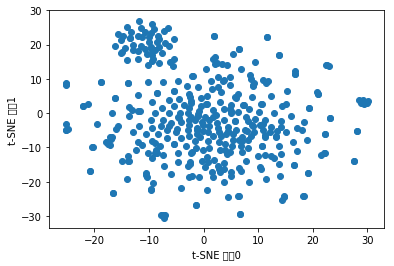

In [17]:
# 시각화
plt.scatter(tsne_result[:, 1], tsne_result[:, 0])
plt.xlim(tsne_result[:, 1].min()-3, tsne_result[:, 1].max()+3) # 최소, 최대
plt.ylim(tsne_result[:, 0].min()-3, tsne_result[:, 0].max()+3) # 최소, 최대
plt.xlabel('t-SNE 특성0') # x축 이름
plt.ylabel('t-SNE 특성1') # y축 이름
plt.show() # 그래프 출력

In [18]:
%time tsne_3d_result = TSNE(n_components=3, learning_rate=300, init='pca').fit_transform(np.array(tsne_data))

CPU times: user 25.7 s, sys: 969 ms, total: 26.7 s
Wall time: 26.6 s


In [19]:
tsne_3d_result[:10]

array([[-138.15144  ,  -85.8636   ,   16.104588 ],
       [   8.86967  ,  -18.365692 , -172.31638  ],
       [-122.24162  ,    1.3722941,  106.4606   ],
       [ 175.9955   ,  -13.258205 ,   11.564963 ],
       [ -71.71737  ,  -23.657705 ,   41.6776   ],
       [-103.85996  ,   42.83773  ,  148.68155  ],
       [ -45.129963 ,  -31.561972 ,    5.502137 ],
       [ -86.47909  ,  163.13261  ,   40.63826  ],
       [ -78.16305  , -120.99602  ,  129.57318  ],
       [-101.118744 ,  -85.46591  ,   22.858034 ]], dtype=float32)

Text(0.5, 0, 'Z Label')

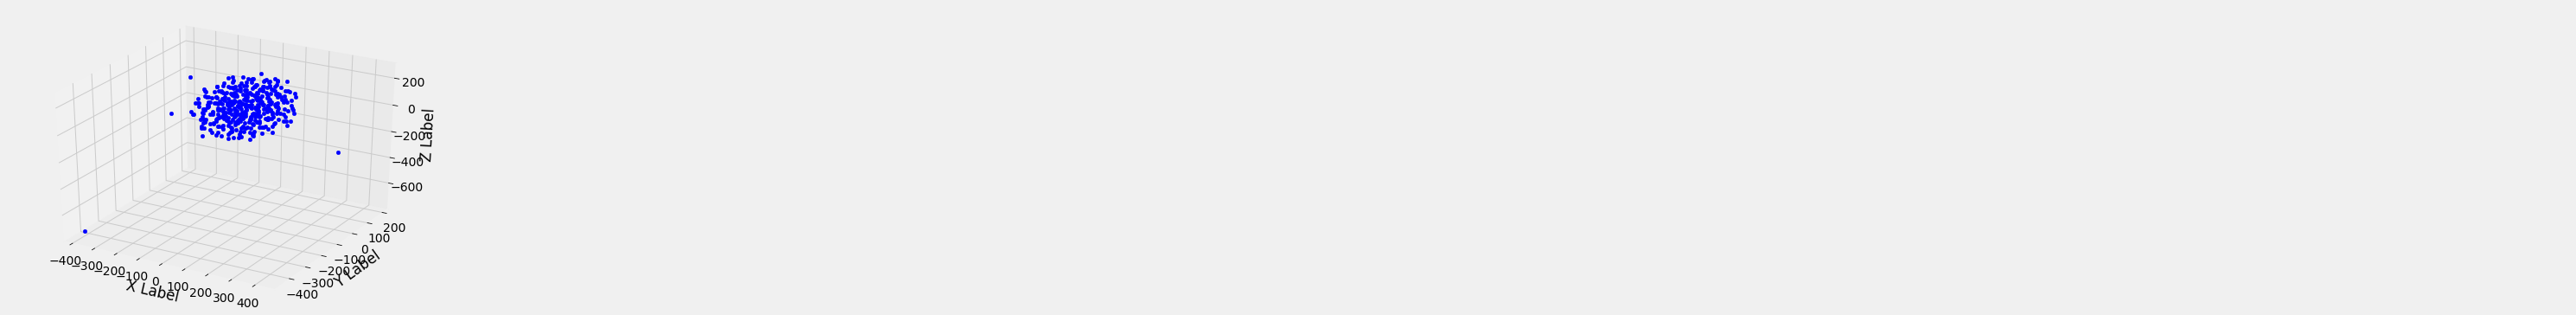

In [47]:
from mpl_toolkits.mplot3d import Axes3D

plt.style.use('fivethirtyeight')

plt.rcParams["figure.figsize"] = (20,10)
plt.rcParams['lines.linewidth'] = 1
plt.rcParams['lines.color'] = 'r'
plt.rcParams['axes.grid'] = True 

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

for x, y, z in tsne_3d_result:
    ax.scatter(x, y, z, c='blue')
    
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

----

### LDA

* Setting Variables

    1. document_topic_counts : List of Counter (len = count of documents)
    2. topic_word_counts : List of Counter (len = count of topic)
    3. topic_counts : List of Integer (len = count of topic)
    4. document_lengths : List of length of documents
    5. distinct_words: All unique words in dataset
    6. V: length of distinct words
    7. D: length of documents
    
* Counter Object
 - Calculate count of elements

In [20]:
from collections import Counter

def get_variables(K):
    # 사용자가 원하는 토픽의 갯수
    K = 8

    # 각 토픽이 각 문서에 할당되는 횟수
    # Counter로 구성된 리스트
    # 각 Counter는 각 문서를 의미
    document_topic_counts = [Counter() for _ in processed_docs]

    # 각 단어가 각 토픽에 할당되는 횟수
    # Counter로 구성된 리스트
    # 각 Counter는 각 토픽을 의미
    topic_word_counts = [Counter() for _ in range(K)]

    # 각 토픽에 할당되는 총 단어수
    # 숫자로 구성된 리스트
    # 각각의 숫자는 각 토픽을 의미함
    topic_counts = [0 for _ in range(K)]

    # 각 문서에 포함되는 총 단어수
    # 숫자로 구성된 리스트
    # 각각의 숫자는 각 문서를 의미함
    document_lengths = list(map(len, processed_docs))

    # 단어 종류의 수
    distinct_words = set(word for document in processed_docs for word in document)
    V = len(distinct_words)

    # 총 문서의 수
    D = len(processed_docs)

    return V, D, document_topic_counts, topic_word_counts, topic_counts, document_lengths, distinct_words

In [21]:
def p_topic_given_document(topic, d, alpha=0.1):
    # 문서 d의 모든 단어 가운데 topic에 속하는
    # 단어의 비율 (alpha를 더해 smoothing)
    return ((document_topic_counts[d][topic] + alpha) /
            (document_lengths[d] + K * alpha))

def p_word_given_topic(word, topic, beta=0.1):
    # topic에 속한 단어 가운데 word의 비율
    # (beta를 더해 smoothing)
    return ((topic_word_counts[topic][word] + beta) /
            (topic_counts[topic] + V * beta))

def topic_weight(d, word, k):
    # 문서와 문서의 단어가 주어지면
    # k번째 토픽의 weight를 반환
    return p_word_given_topic(word, k) * p_topic_given_document(k, d)

In [22]:
def choose_new_topic(d, word):
    return sample_from([topic_weight(d, word, k) for k in range(K)])

import random
def sample_from(weights):
    # i를 weights[i] / sum(weights)
    # 확률로 반환
    total = sum(weights)
    # 0과 total 사이를 균일하게 선택
    rnd = total * random.random()
    # 아래 식을 만족하는 가장 작은 i를 반환
    # weights[0] + ... + weights[i] >= rnd
    for i, w in enumerate(weights):
        rnd -= w
        if rnd <= 0:
            return i

* Run
 - Initialize Topic using random value by word in documents
 - Calculate variables
    1. document_topic_counts
        - count of topic word in every document
        - 개별 문서에서 topic word의 등장 횟수
    2. topic_word_counts
        - appearance count of words in whole documents
        - every word seperate by topic
        - 개별 Topic에서 topic word의 등장 횟수(전체 문서 기준)

In [23]:
random.seed(0)

K = 8
V, D, document_topic_counts, topic_word_counts, topic_counts, document_lengths, distinct_words = get_variables(K)

# 각 단어를 임의의 토픽에 랜덤 배정
document_topics = [[random.randrange(K) for word in document] for document in processed_docs]

# 위와 같이 랜덤 초기화한 상태에서 
# AB를 구하는 데 필요한 숫자를 세어봄
for d in range(D):
    for word, topic in zip(processed_docs[d], document_topics[d]):
        document_topic_counts[d][topic] += 1
        topic_word_counts[topic][word] += 1
        topic_counts[topic] += 1

In [24]:
len(processed_docs)

400

----

In [ ]:
import time
start_time = time.time() 

for iter in range(3000):
    for d in range(D):
        for i, (word, topic) in enumerate(zip(processed_docs[d], document_topics[d])):
            # 깁스 샘플링 수행을 위해
            # 샘플링 대상 word와 topic을 제외하고 세어봄
            document_topic_counts[d][topic] -= 1
            topic_word_counts[topic][word] -= 1
            topic_counts[topic] -= 1
            document_lengths[d] -= 1

            # 깁스 샘플링 대상 word와 topic을 제외한 
            # 말뭉치 모든 word의 topic 정보를 토대로
            # 샘플링 대상 word의 새로운 topic을 선택
            new_topic = choose_new_topic(d, word)
            document_topics[d][i] = new_topic

            # 샘플링 대상 word의 새로운 topic을 반영해 
            # 말뭉치 정보 업데이트
            document_topic_counts[d][new_topic] += 1
            topic_word_counts[new_topic][word] += 1
            topic_counts[new_topic] += 1
            document_lengths[d] += 1
    
    print("--- %d iter: %s mins ---" % (iter, str((time.time() - start_time) / 60.)))

print("--- %s mins ---" % str((time.time() - start_time) / 60.))

In [26]:
## i번째 document의 topic 비중
document_topic_counts[0]

Counter({0: 16, 1: 0, 2: 0, 3: 0, 4: 2, 5: 0, 6: 1, 7: 0})

In [27]:
## i번째 topic의 단어 비중
for i in range(8):
    print('Topic %d: %s' % (i, ','.join(['%s(%s)' % (k, topic_word_counts[i].get(k)) for k in topic_word_counts[i].keys() if topic_word_counts[i].get(k) >= 25])))

Topic 0: model(31),regress(33)
Topic 1: 
Topic 2: year(25),cancer(27)
Topic 3: score(37),stroke(27),risk(49)
Topic 4: caus(33),year(36),death(34)
Topic 5: coronari(47)
Topic 6: event(78),grade(30),group(29),advers(70),popul(28),patient(26),treatment(66)
Topic 7: patient(57)


In [28]:
## i번째 topic의 단어 비중
for i in range(8):
    print('Topic %d: %s' % (i, ','.join(['%s(%s)' % (a, b) for a, b in topic_word_counts[i].most_common(10)])))

Topic 0: regress(33),model(31),hazard(24),multivari(23),ventricular(23),analysi(23),death(21),proport(21),valu(21),heart(20)
Topic 1: intervent(19),modern(13),women(12),method(12),estim(12),level(11),incom(11),countri(9),high(9),activ(8)
Topic 2: cancer(27),year(25),health(15),incid(14),surviv(13),standardis(13),ratio(13),develop(13),type(12),countri(12)
Topic 3: risk(49),score(37),stroke(27),associ(19),factor(19),patient(17),ischaem(14),vasc(14),accord(13),studi(12)
Topic 4: year(36),death(34),caus(33),efficaci(19),rat(19),specif(17),mortal(16),relat(16),adjust(16),chang(13)
Topic 5: coronari(47),arteri(17),patient(16),detect(15),wall(15),angiographi(13),flow(13),diagnost(13),segment(12),comput(12)
Topic 6: event(78),advers(70),treatment(66),grade(30),group(29),popul(28),patient(26),emerg(22),safeti(22),relat(17)
Topic 7: patient(57),outcom(24),hospit(22),clinic(21),acut(21),legend(20),myocardi(18),infarct(17),therapi(13),versus(11)


In [29]:
documents.head()

,Origin_Text,index
0,Hazard Ratio (and 95% Confidence Intervals) in Univariate and Multivariate Analysis of Predictors of Major Cardiac Events (Cardiac Death or Worsening of Heart Failure Leading to Heart Transplantation),0
1,"Left Ventricular and Right Ventricular Ejection Fractions, Left Ventricular and Right Ventricular Mean Phases, Left-to-Right Mean Phase Difference (L-RMP) and Phase Standard Deviations for Both Ventricles in 30 Cases of Left Sided WPW legend",1
2,"Partial Regression Coefficients (All Subjects, n = 262) for Forward Stepwise Linear Regression for Dependent Variables Augmentation Pressure and Augmentation Index legend",2
3,"Left Ventricular (LVEF) and Right Ventricular (RVEF) Ejection Fractions, Left Ventricular (LVMP) and Right Ventricular (RVMP) Mean Phases, Left-to-Right Mean Phase Difference (L-RMP) and Phase Standard Deviations (LVPSD and RVPSD) for Both Ventricles in 14 Cases of Right Sided WPW legend",3
4,Predictors of Mortality by Multivariable Analysis: Variables Are Shown in the Order They Entered a Stepwise Cox Regression Model,4


In [30]:
import operator

doc_result = documents[['index', 'Origin_Text']]
doc_result.columns = ['id', 'document']
doc_result['topic'] = doc_result.id.apply(lambda x: max(document_topic_counts[x].items(), key=operator.itemgetter(1))[0])
doc_result['topic_prob'] = doc_result.id.apply(lambda x: max(document_topic_counts[x].items(), key=operator.itemgetter(1))[1])
doc_result['topic_word'] = doc_result.topic.apply(lambda x: ','.join(['%s(%s)' % (a, b)for a, b in topic_word_counts[x].most_common(10)]))
doc_result = pd.merge(doc_result, pd.DataFrame(tsne_result, columns=['plot_x', 'plot_y']), left_index=True, right_index=True)
doc_result = pd.merge(doc_result, pd.DataFrame(tsne_3d_result, columns=['td_x', 'td_y', 'td_z']), left_index=True, right_index=True)

/Users/gracelee/.pyenv/versions/for_jupyter/lib/python3.5/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/Users/gracelee/.pyenv/versions/for_jupyter/lib/python3.5/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/gracelee/.pyenv/versions/for_jupyter/lib/python3.5/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the c

In [31]:
plt.style.available

['seaborn-bright',
 'classic',
 'seaborn-poster',
 'ggplot',
 'seaborn-notebook',
 'seaborn-dark-palette',
 '_classic_test',
 'seaborn-paper',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn',
 'seaborn-muted',
 'seaborn-pastel',
 'seaborn-darkgrid',
 'seaborn-deep',
 'bmh',
 'seaborn-white',
 'fivethirtyeight',
 'seaborn-ticks',
 'fast',
 'Solarize_Light2',
 'seaborn-talk',
 'dark_background',
 'grayscale',
 'tableau-colorblind10',
 'seaborn-whitegrid']

In [ ]:
plt.style.use('fivethirtyeight')

plt.rcParams["figure.figsize"] = (20,10)
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.color'] = 'r'
plt.rcParams['axes.grid'] = True 

doc_result.plot.scatter(x='plot_x', y='plot_y', c='topic', colormap='Accent')

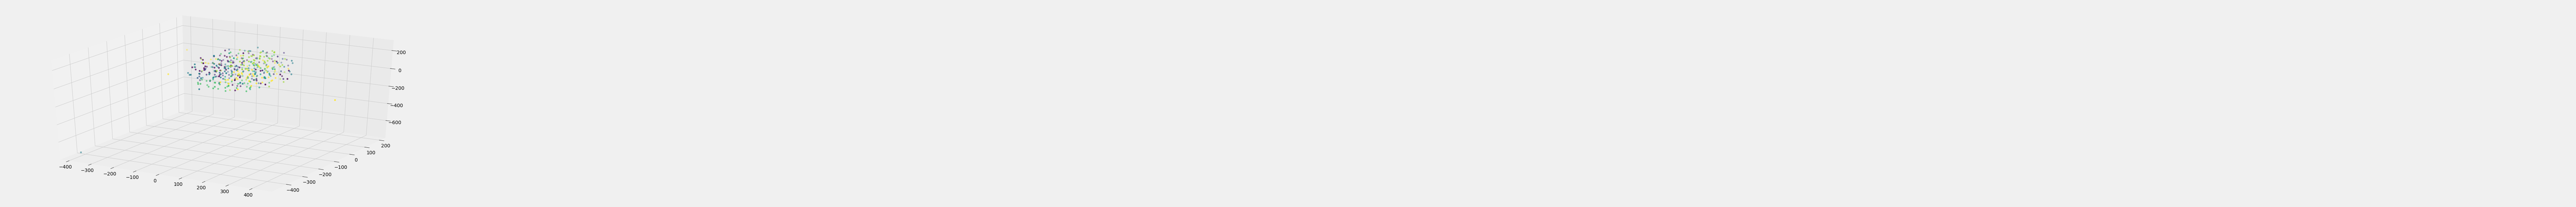

In [48]:
threedee = plt.figure().gca(projection='3d')
threedee.scatter(doc_result.td_x, doc_result.td_y, doc_result.td_z, c=doc_result.topic)

plt.savefig('3d_scatter_lda.png')

In [ ]:
doc_result[doc_result.topic == 3].sort_values('topic_prob', ascending=False).head()

In [ ]:
doc_result.sort_values('topic_prob', ascending=False).head()

* 깁스 샘플링(Gibbs Sampling) 
    * http://4four.us/article/2014/10/lda-parameter-estimation
    * https://bab2min.tistory.com/569

* PyLDAvis
    * https://lovit.github.io/nlp/2018/09/27/pyldavis_lda/

----

In [34]:
import pyLDAvis.gensim

In [35]:
# numpy.ndarray, shape = (n_topics, n_terms)
topic_term_dists = np.array([topic_word_counts[i][k] for i in range(K) for k in list(distinct_words)]).reshape((K, len(distinct_words))) 

# numpy.ndarray, shape = (n_docs, n_topics)
doc_topic_dists = np.array([list(d.values()) for d in document_topic_counts])

# numpy.ndarray, shape = (n_docs,)
doc_lengths = np.array(document_lengths)

# list of str, vocab list
vocab = list(distinct_words)

# numpy.ndarray, shape = (n_vocabs,)
term_frequency = np.array([topic_word_counts[i][k] for i in range(K) for k in list(distinct_words)]).reshape((K, len(distinct_words))).sum(axis=0)

* topic_term_dists: topic_term_dists
* doc_topic_dists: doc_topic_dists
* doc_lengths: doc_lengths
* vocab: vocab
* term_frequency: term_frequency

In [38]:
lda_mallet_data = {
    'topic_term_dists':topic_term_dists,
    'doc_topic_dists':doc_topic_dists,
    'doc_lengths':doc_lengths,
    'vocab':vocab,
    'term_frequency':term_frequency
}
vis_data = pyLDAvis.prepare(**lda_mallet_data)
# pyLDAvis.display(vis_data)
# pyLDAvis.save_html(vis_data, 'test.html')

/Users/gracelee/.pyenv/versions/for_jupyter/lib/python3.5/site-packages/pyLDAvis/_prepare.py:223: RuntimeWarning: divide by zero encountered in log
  kernel = (topic_given_term * np.log((topic_given_term.T / topic_proportion).T))
/Users/gracelee/.pyenv/versions/for_jupyter/lib/python3.5/site-packages/pyLDAvis/_prepare.py:240: RuntimeWarning: divide by zero encountered in log
  log_lift = np.log(topic_term_dists / term_proportion)
/Users/gracelee/.pyenv/versions/for_jupyter/lib/python3.5/site-packages/pyLDAvis/_prepare.py:241: RuntimeWarning: divide by zero encountered in log
  log_ttd = np.log(topic_term_dists)
/Users/gracelee/.pyenv/versions/for_jupyter/lib/python3.5/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([def

In [39]:
# LDAvis의 우측 HBar Chart Data
# Freq: Estimated term frequency within the selected topic
# Total: Overall term frequency
print(vis_data.topic_info.Category.unique())
vis_data.topic_info[vis_data.topic_info.Category == 'Topic1'].sort_values('Freq', ascending=False).head()

['Default' 'Topic1' 'Topic2' 'Topic3' 'Topic4' 'Topic5' 'Topic6' 'Topic7'
 'Topic8']


,Category,Freq,Term,Total,loglift,logprob
term,,,,,,
1160,Topic1,503910.0,regress,503910.0,8.4280,3.4965
192,Topic1,473370.0,model,548574.0,8.2806,3.4340
101,Topic1,366480.0,hazard,426575.0,8.2762,3.1781
1094,Topic1,351210.0,ventricular,351210.0,8.4280,3.1355
1119,Topic1,351210.0,analysi,638765.0,7.8299,3.1355


----

## Visualization

### 1. Main View
* Layout: https://www.codingfactory.net/10530

#### a. HBar Chart
* Data: vis_data.topic_info[vis_data.topic_info.Category == 'Topic1'].sort_values('Freq', ascending=False).head()
* D3: http://bl.ocks.org/erikvullings/51cc5332439939f1f292

In [41]:
import json

hbar_json = {}
hbar_json['labels'] = vis_data.topic_info.Category.unique().tolist()
hbar_json['max_width'] = vis_data.topic_info[vis_data.topic_info.Category != 'Default'][['Total']].max()[0]
for l in vis_data.topic_info.Category.unique().tolist():
    tmp_df = vis_data.topic_info[vis_data.topic_info.Category == l].sort_values(['Category', 'Freq'], ascending=[True, False]).groupby('Category').head()
    sub_json = {}

    hbar_json[l] = list(tmp_df[['Term', 'Freq', 'Total']].sort_values('Freq', ascending=False).reset_index().to_dict('index').values())
    
f = open('./lda/hbar_data.json', 'w')
f.write(json.dumps(hbar_json, indent=4))
f.close()

#### b. Scatter Chart
* Data: tsne_result
* D3: https://bl.ocks.org/Niekes/1c15016ae5b5f11508f92852057136b5

In [42]:
doc_result = documents[['index', 'Origin_Text']]
doc_result.columns = ['id', 'document']
doc_result['topic'] = doc_result.id.apply(lambda x: max(document_topic_counts[x].items(), key=operator.itemgetter(1))[0])
doc_result['topic_prob'] = doc_result.id.apply(lambda x: max(document_topic_counts[x].items(), key=operator.itemgetter(1))[1])
doc_result['topic_word'] = doc_result.topic.apply(lambda x: ','.join(['%s(%s)' % (a, b)for a, b in topic_word_counts[x].most_common(10)]))
doc_result = pd.merge(doc_result, pd.DataFrame(tsne_result, columns=['plot_x', 'plot_y']), left_index=True, right_index=True)
doc_result = pd.merge(doc_result, pd.DataFrame(tsne_3d_result, columns=['td_x', 'td_y', 'td_z']), left_index=True, right_index=True)

/Users/gracelee/.pyenv/versions/for_jupyter/lib/python3.5/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/gracelee/.pyenv/versions/for_jupyter/lib/python3.5/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Users/gracelee/.pyenv/versions/for_jupyter/lib/python3.5/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to

In [43]:
scatter_json = list(doc_result[['id', 'plot_x', 'plot_y', 'topic']].to_dict('index').values())

f = open('./lda/scatter_data.json', 'w')
f.write(json.dumps(scatter_json, indent=4))
f.close()

#### c. Table
* Data: doc_result[['topic', 'document']].head()

In [428]:
doc_result.to_csv('lda.tsv', sep='\t', index_label=False)

In [423]:
doc_result.groupby('topic').head(1)[['topic', 'topic_word']]

,topic,topic_word
0,0,"model(35),regress(33),multivari(24),hazard(24),heart(23),analysi(23),ventricular(23),proport(21),valu(21),differ(20)"
50,1,"intervent(18),method(14),modern(13),estim(12),incom(11),countri(11),level(10),women(10),effect(8),physic(8)"
51,2,"cancer(27),year(25),health(16),incid(15),surviv(13),ratio(12),standardis(12),child(11),diagnos(10),type(10)"
66,6,"event(76),advers(70),treatment(70),patient(31),grade(30),group(30),popul(28),emerg(22),safeti(22),studi(16)"
69,3,"risk(52),score(37),stroke(27),patient(23),factor(19),associ(18),vasc(14),accord(13),ischaem(13),area(13)"
150,7,"patient(49),hospit(22),acut(21),outcom(19),clinic(19),myocardi(18),infarct(17),legend(16),therapi(14),complic(10)"
201,4,"death(39),year(37),caus(31),rat(24),mortal(17),efficaci(17),specif(15),adjust(14),age(13),drinker(13)"
250,5,"coronari(44),patient(19),arteri(16),wall(15),legend(15),diagnost(13),angiographi(13),detect(12),flow(12),tomographi(12)"


In [426]:
doc_result.groupby('topic').agg({'id': 'unique'})

,id
topic,
0,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 184, 220, 245, 252, 254, 255, 262, 264, 266, 268, 270, 272, 274, 276, 278, 286, 288, 290]"
1,"[50, 52, 53, 54, 55, 60, 62, 63, 64, 65, 68, 70, 71, 72, 76, 77, 79, 80, 81, 83, 85, 86, 87, 88, 89, 91, 93, 94, 96, 98, 99, 284, 366, 377, 391, 394, 396]"
2,"[51, 56, 57, 58, 59, 61, 67, 73, 74, 84, 115, 200, 203, 204, 205, 206, 208, 213, 215, 218, 221, 223, 225, 226, 231, 233, 236, 248, 263, 275, 386, 392]"
3,"[69, 195, 251, 256, 280, 282, 283, 289, 292, 296, 297, 298, 350, 351, 352, 353, 354, 355, 357, 358, 359, 360, 361, 362, 363, 364, 365, 367, 368, 369, 370, 371, 372, 373, 374, 376, 378, 379, 380, 381, 382, 383, 384, 385, 387, 388, 389, 390, 393, 395, 397, 398, 399]"
4,"[201, 202, 207, 209, 210, 211, 212, 214, 216, 217, 219, 222, 224, 227, 228, 229, 230, 232, 234, 235, 237, 238, 239, 240, 241, 242, 243, 244, 246, 247, 249, 257, 260, 265, 269, 273, 279, 291, 293, 294]"
5,"[250, 253, 258, 261, 277, 285, 300, 303, 304, 305, 306, 307, 308, 309, 310, 313, 314, 315, 316, 317, 319, 320, 322, 323, 324, 325, 326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338, 339, 340, 341, 342, 343, 344, 345, 346, 347, 348, 349]"
6,"[66, 75, 78, 82, 90, 92, 95, 97, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 186, 271, 301, 302, 318]"
7,"[150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 185, 187, 188, 189, 190, 191, 192, 193, 194, 196, 197, 198, 199, 259, 267, 281, 287, 295, 299, 311, 312, 321, 356, 375]"
